In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot

In [34]:
# Importing the datasets
df_original = pd.read_csv("../waters_datasets/Datasets_With_Predictions/Dataset2-anfis.csv", encoding= 'unicode_escape')

df_new = pd.read_csv("./list_of_stations.csv", encoding = 'unicode_escape')

In [35]:
df_new.dtypes

Water Quality\nStation Code               float64
Name or Location of Monitoring Station     object
State/UT                                   object
Type of Water\nBody                        object
Frequency of\nMonitoring                   object
Latitude                                   object
Longitude                                 float64
Unnamed: 7                                float64
dtype: object

In [36]:
df_new.head()

,Water Quality\nStation Code,Name or Location of Monitoring Station,State/UT,Type of Water\nBody,Frequency of\nMonitoring,Latitude,Longitude,Unnamed: 7
0,14.0,"GODAVARI AT POLAVARAM, WEST GODAVARI DISTRICT",ANDHRA PRADESH,RIVER,MONTHLY,17.247331,81.646613,NaN
1,25.0,"KRISHNA AT VIJAYWADA, KRISHNA",ANDHRA PRADESH,RIVER,MONTHLY,16.492476,80.640839,NaN
2,26.0,"WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA",ANDHRA PRADESH,GROUND WATER,HALF-YEARLY,16.508853,80.641519,NaN
3,30.0,"PENNAR AT SIDDVATAM, KADAPA",ANDHRA PRADESH,RIVER,MONTHLY,14.464393,78.964627,NaN
4,1174.0,"TUNGABHADRA AT KURNOOL U/S, BHAVAPURAM, KURNOOL",ANDHRA PRADESH,RIVER,MONTHLY,15.8483,78.034942,NaN


In [37]:
#Drop random column
df_new.drop("Unnamed: 7", inplace = True, axis = 1)

In [38]:
df_new.shape

(4205, 7)

<AxesSubplot:>

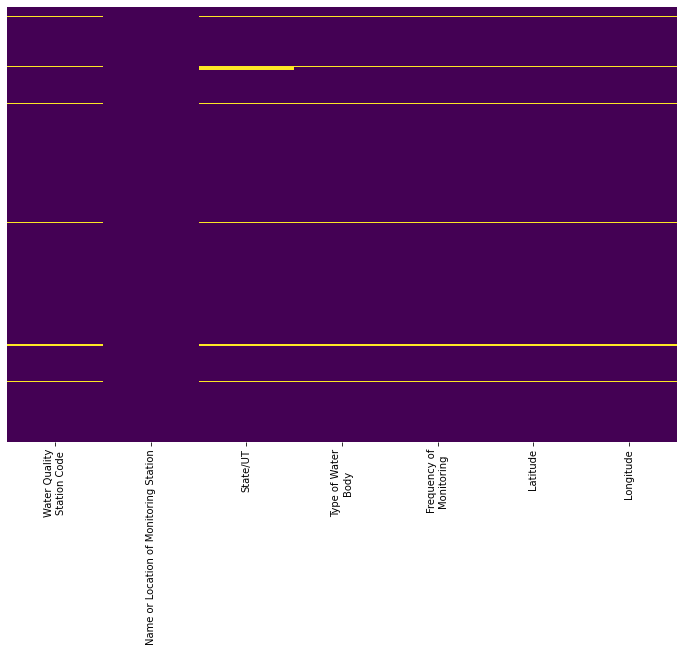

In [39]:
# checking for missing values in the dataset
plt.figure(figsize=(12,8))
sns.heatmap(df_new.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [40]:
#drop all rows with missing values
df_new.dropna(axis = 0, inplace = True)

In [41]:
#Change types of latitude and station code to float and int
df_new["Latitude"] = pd.to_numeric(df_new["Latitude"], errors='coerce')
df_new["Water Quality\nStation Code"] = df_new["Water Quality\nStation Code"].astype(int)

In [42]:
df_new.head()

,Water Quality\nStation Code,Name or Location of Monitoring Station,State/UT,Type of Water\nBody,Frequency of\nMonitoring,Latitude,Longitude
0,14,"GODAVARI AT POLAVARAM, WEST GODAVARI DISTRICT",ANDHRA PRADESH,RIVER,MONTHLY,17.247331,81.646613
1,25,"KRISHNA AT VIJAYWADA, KRISHNA",ANDHRA PRADESH,RIVER,MONTHLY,16.492476,80.640839
2,26,"WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA",ANDHRA PRADESH,GROUND WATER,HALF-YEARLY,16.508853,80.641519
3,30,"PENNAR AT SIDDVATAM, KADAPA",ANDHRA PRADESH,RIVER,MONTHLY,14.464393,78.964627
4,1174,"TUNGABHADRA AT KURNOOL U/S, BHAVAPURAM, KURNOOL",ANDHRA PRADESH,RIVER,MONTHLY,15.848300,78.034942


In [43]:
df_original.shape

(1148, 15)

In [44]:
df_original.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf,WQI_pred
0,0,1001,BEAS AT U/S MANALI,HIMACHAL PRADESH,6.2,8.6,7.7,110.0,0.3,0.7,10.0,641.0,44.135571,2,44.135478
1,1,1002,BEAS AT D/S KULU,HIMACHAL PRADESH,11.1,9.2,7.4,107.0,1.0,0.7,495.0,1200.0,53.078269,1,53.077960
2,2,1003,BEAS AT D/S AUT,HIMACHAL PRADESH,9.2,9.8,7.7,123.0,0.5,0.7,60.0,897.0,41.297107,2,41.296992
3,3,1004,BEAS AT U/SPANDON DAM,HIMACHAL PRADESH,10.0,9.5,7.7,161.0,0.3,0.7,13.0,141.0,39.773308,2,39.773198
4,4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,HIMACHAL PRADESH,13.3,10.5,7.9,172.0,0.3,0.7,101.0,778.0,40.521799,2,40.521809


<AxesSubplot:>

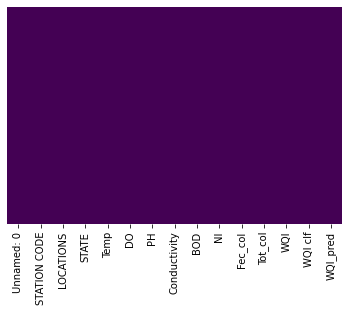

In [45]:
sns.heatmap(df_original.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Creating columns for longitude and latitude in the original dataset.

In [47]:
latitude = [0.0 for x in range(1148)]
df_original["latitude"] = latitude
longitude = [0.0 for x in range(1148)]
df_original["longitude"] = longitude

df_original.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf,WQI_pred,latitude,longitude
0,0,1001,BEAS AT U/S MANALI,HIMACHAL PRADESH,6.2,8.6,7.7,110.0,0.3,0.7,10.0,641.0,44.135571,2,44.135478,0.0,0.0
1,1,1002,BEAS AT D/S KULU,HIMACHAL PRADESH,11.1,9.2,7.4,107.0,1.0,0.7,495.0,1200.0,53.078269,1,53.077960,0.0,0.0
2,2,1003,BEAS AT D/S AUT,HIMACHAL PRADESH,9.2,9.8,7.7,123.0,0.5,0.7,60.0,897.0,41.297107,2,41.296992,0.0,0.0
3,3,1004,BEAS AT U/SPANDON DAM,HIMACHAL PRADESH,10.0,9.5,7.7,161.0,0.3,0.7,13.0,141.0,39.773308,2,39.773198,0.0,0.0
4,4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,HIMACHAL PRADESH,13.3,10.5,7.9,172.0,0.3,0.7,101.0,778.0,40.521799,2,40.521809,0.0,0.0


In [48]:
df_original = df_original.drop(["Unnamed: 0","LOCATIONS","STATE","Temp","DO","PH","Conductivity","WQI","BOD","NI","Fec_col","Tot_col"], axis = 1)

In [49]:
df_original.dtypes

STATION CODE      int64
WQI clf           int64
WQI_pred        float64
latitude        float64
longitude       float64
dtype: object

Rename the columns

In [50]:
# Changing column names
df_original = df_original.rename(columns={"STATION CODE":"S.Code"})

In [51]:
df_original.dtypes

S.Code         int64
WQI clf        int64
WQI_pred     float64
latitude     float64
longitude    float64
dtype: object

In [52]:
print(df_original.loc[(df_original['longitude'] == 0) & (df_original['S.Code'] == 1533.0)])

     S.Code  WQI clf  WQI_pred  latitude  longitude
835    1533        2  45.01751       0.0        0.0


Remove the duplicates from the dataframe. We will keep just one instance from the instances that have the same station code to simplify the  process.

In [53]:
df_original = df_original.drop_duplicates("S.Code")

Group by the station code becuase there are multiple instances that have the same station code but different measurements.

In [54]:
station_code_groups = df_original.groupby('S.Code')

In [55]:
for name, group in station_code_groups:
    print(name)
    print(group)
    print("\n")

1
     S.Code  WQI clf   WQI_pred  latitude  longitude
246       1        0  81.905092       0.0        0.0


2
     S.Code  WQI clf    WQI_pred  latitude  longitude
247       2        0  294.563711       0.0        0.0


3
     S.Code  WQI clf   WQI_pred  latitude  longitude
996       3        1  66.754945       0.0        0.0


4
     S.Code  WQI clf   WQI_pred  latitude  longitude
235       4        1  64.655621       0.0        0.0


5
     S.Code  WQI clf   WQI_pred  latitude  longitude
236       5        0  78.938526       0.0        0.0


7
     S.Code  WQI clf   WQI_pred  latitude  longitude
266       7        1  61.741295       0.0        0.0


9
     S.Code  WQI clf   WQI_pred  latitude  longitude
275       9        2  49.433074       0.0        0.0


10
     S.Code  WQI clf   WQI_pred  latitude  longitude
277      10        1  55.027016       0.0        0.0


11
     S.Code  WQI clf    WQI_pred  latitude  longitude
413      11        0  114.490083       0.0        0.0


12
 

349    1081        0  78.688902       0.0        0.0


1082
     S.Code  WQI clf    WQI_pred  latitude  longitude
350    1082        0  101.535025       0.0        0.0


1083
     S.Code  WQI clf    WQI_pred  latitude  longitude
351    1083        0  108.292829       0.0        0.0


1084
     S.Code  WQI clf   WQI_pred  latitude  longitude
352    1084        0  98.592377       0.0        0.0


1086
    S.Code  WQI clf   WQI_pred  latitude  longitude
21    1086        2  43.065858       0.0        0.0


1087
    S.Code  WQI clf   WQI_pred  latitude  longitude
22    1087        2  47.247053       0.0        0.0


1088
    S.Code  WQI clf   WQI_pred  latitude  longitude
40    1088        2  44.721767       0.0        0.0


1089
    S.Code  WQI clf   WQI_pred  latitude  longitude
39    1089        2  39.168305       0.0        0.0


1090
    S.Code  WQI clf   WQI_pred  latitude  longitude
43    1090        2  36.303786       0.0        0.0


1091
     S.Code  WQI clf  WQI_pred  latitude  

     S.Code  WQI clf   WQI_pred  latitude  longitude
271    1236        1  52.131889       0.0        0.0


1239
     S.Code  WQI clf   WQI_pred  latitude  longitude
265    1239        1  53.745373       0.0        0.0


1240
     S.Code  WQI clf   WQI_pred  latitude  longitude
254    1240        1  65.510861       0.0        0.0


1241
     S.Code  WQI clf  WQI_pred  latitude  longitude
252    1241        1  60.30378       0.0        0.0


1243
     S.Code  WQI clf   WQI_pred  latitude  longitude
269    1243        1  68.748998       0.0        0.0


1244
     S.Code  WQI clf   WQI_pred  latitude  longitude
268    1244        1  57.106217       0.0        0.0


1245
     S.Code  WQI clf   WQI_pred  latitude  longitude
267    1245        1  61.132312       0.0        0.0


1246
     S.Code  WQI clf    WQI_pred  latitude  longitude
536    1246        0  142.139464       0.0        0.0


1247
     S.Code  WQI clf     WQI_pred  latitude  longitude
283    1247        0  1102.062709       0

697    1419        0  260.601654       0.0        0.0


1420
     S.Code  WQI clf   WQI_pred  latitude  longitude
737    1420        1  60.269582       0.0        0.0


1421
     S.Code  WQI clf    WQI_pred  latitude  longitude
738    1421        0  498.146861       0.0        0.0


1422
     S.Code  WQI clf  WQI_pred  latitude  longitude
188    1422        1  52.17548       0.0        0.0


1423
     S.Code  WQI clf   WQI_pred  latitude  longitude
202    1423        1  66.767101       0.0        0.0


1424
     S.Code  WQI clf   WQI_pred  latitude  longitude
666    1424        2  39.436585       0.0        0.0


1426
     S.Code  WQI clf   WQI_pred  latitude  longitude
808    1426        1  57.063427       0.0        0.0


1428
     S.Code  WQI clf   WQI_pred  latitude  longitude
676    1428        2  43.192669       0.0        0.0


1429
     S.Code  WQI clf   WQI_pred  latitude  longitude
779    1429        1  68.022242       0.0        0.0


1430
     S.Code  WQI clf   WQI_pred  la

     S.Code  WQI clf   WQI_pred  latitude  longitude
841    1539        1  63.456693       0.0        0.0


1540
     S.Code  WQI clf   WQI_pred  latitude  longitude
842    1540        2  44.404548       0.0        0.0


1541
     S.Code  WQI clf   WQI_pred  latitude  longitude
843    1541        1  71.521013       0.0        0.0


1542
     S.Code  WQI clf   WQI_pred  latitude  longitude
844    1542        1  51.727215       0.0        0.0


1543
     S.Code  WQI clf   WQI_pred  latitude  longitude
551    1543        1  52.698055       0.0        0.0


1544
     S.Code  WQI clf   WQI_pred  latitude  longitude
552    1544        1  66.852906       0.0        0.0


1545
     S.Code  WQI clf   WQI_pred  latitude  longitude
553    1545        1  55.742466       0.0        0.0


1546
     S.Code  WQI clf   WQI_pred  latitude  longitude
555    1546        1  54.304907       0.0        0.0


1547
     S.Code  WQI clf   WQI_pred  latitude  longitude
556    1547        1  53.187355       0.0  

1037    1721        1  62.950579       0.0        0.0


1722
      S.Code  WQI clf  WQI_pred  latitude  longitude
1038    1722        1  54.77895       0.0        0.0


1723
      S.Code  WQI clf   WQI_pred  latitude  longitude
1039    1723        1  61.376704       0.0        0.0


1724
      S.Code  WQI clf  WQI_pred  latitude  longitude
1040    1724        1  67.41464       0.0        0.0


1725
      S.Code  WQI clf   WQI_pred  latitude  longitude
1041    1725        1  60.235962       0.0        0.0


1726
     S.Code  WQI clf   WQI_pred  latitude  longitude
683    1726        0  93.783756       0.0        0.0


1727
     S.Code  WQI clf   WQI_pred  latitude  longitude
811    1727        0  87.438361       0.0        0.0


1728
     S.Code  WQI clf   WQI_pred  latitude  longitude
812    1728        0  79.590668       0.0        0.0


1729
     S.Code  WQI clf    WQI_pred  latitude  longitude
698    1729        0  188.246449       0.0        0.0


1730
     S.Code  WQI clf  WQI_pre

      S.Code  WQI clf   WQI_pred  latitude  longitude
1108    1834        1  67.257908       0.0        0.0


1835
      S.Code  WQI clf   WQI_pred  latitude  longitude
1109    1835        1  69.170802       0.0        0.0


1836
      S.Code  WQI clf   WQI_pred  latitude  longitude
1110    1836        1  65.588879       0.0        0.0


1837
      S.Code  WQI clf   WQI_pred  latitude  longitude
1111    1837        1  70.766803       0.0        0.0


1838
      S.Code  WQI clf   WQI_pred  latitude  longitude
1112    1838        1  63.871233       0.0        0.0


1839
      S.Code  WQI clf   WQI_pred  latitude  longitude
1113    1839        0  77.620885       0.0        0.0


1840
      S.Code  WQI clf   WQI_pred  latitude  longitude
1114    1840        1  70.566017       0.0        0.0


1841
      S.Code  WQI clf   WQI_pred  latitude  longitude
1115    1841        1  70.971935       0.0        0.0


1842
      S.Code  WQI clf   WQI_pred  latitude  longitude
1116    1842        1  72.

1977
     S.Code  WQI clf    WQI_pred  latitude  longitude
748    1977        0  238.493622       0.0        0.0


1979
     S.Code  WQI clf     WQI_pred  latitude  longitude
753    1979        0  1166.471884       0.0        0.0


1981
     S.Code  WQI clf   WQI_pred  latitude  longitude
270    1981        2  48.998977       0.0        0.0


1982
     S.Code  WQI clf    WQI_pred  latitude  longitude
286    1982        0  181.956458       0.0        0.0


1983
     S.Code  WQI clf    WQI_pred  latitude  longitude
287    1983        0  156.652873       0.0        0.0


1984
     S.Code  WQI clf   WQI_pred  latitude  longitude
971    1984        0  90.353882       0.0        0.0


1985
     S.Code  WQI clf   WQI_pred  latitude  longitude
972    1985        0  128.59177       0.0        0.0


1986
     S.Code  WQI clf   WQI_pred  latitude  longitude
973    1986        0  76.395078       0.0        0.0


1987
     S.Code  WQI clf    WQI_pred  latitude  longitude
974    1987        0  110.1

762    2128        1  59.202355       0.0        0.0


2129
     S.Code  WQI clf   WQI_pred  latitude  longitude
763    2129        1  56.638199       0.0        0.0


2131
     S.Code  WQI clf   WQI_pred  latitude  longitude
764    2131        1  66.269421       0.0        0.0


2132
     S.Code  WQI clf   WQI_pred  latitude  longitude
765    2132        1  68.263062       0.0        0.0


2134
     S.Code  WQI clf   WQI_pred  latitude  longitude
766    2134        1  59.309232       0.0        0.0


2136
     S.Code  WQI clf   WQI_pred  latitude  longitude
767    2136        0  93.585249       0.0        0.0


2137
     S.Code  WQI clf   WQI_pred  latitude  longitude
757    2137        0  86.458409       0.0        0.0


2138
     S.Code  WQI clf   WQI_pred  latitude  longitude
758    2138        1  61.287531       0.0        0.0


2139
     S.Code  WQI clf   WQI_pred  latitude  longitude
759    2139        2  48.549287       0.0        0.0


2140
     S.Code  WQI clf   WQI_pred  lat

862    2260        2  37.252728       0.0        0.0


2261
     S.Code  WQI clf   WQI_pred  latitude  longitude
863    2261        1  56.498716       0.0        0.0


2262
     S.Code  WQI clf   WQI_pred  latitude  longitude
864    2262        2  40.859266       0.0        0.0


2263
     S.Code  WQI clf   WQI_pred  latitude  longitude
865    2263        1  53.126008       0.0        0.0


2264
     S.Code  WQI clf   WQI_pred  latitude  longitude
866    2264        0  80.904306       0.0        0.0


2267
     S.Code  WQI clf   WQI_pred  latitude  longitude
684    2267        0  78.112114       0.0        0.0


2268
     S.Code  WQI clf   WQI_pred  latitude  longitude
694    2268        0  82.892695       0.0        0.0


2269
     S.Code  WQI clf   WQI_pred  latitude  longitude
703    2269        1  65.010495       0.0        0.0


2270
     S.Code  WQI clf   WQI_pred  latitude  longitude
554    2270        1  73.687538       0.0        0.0


2271
     S.Code  WQI clf   WQI_pred  lat

Copying the longitude and latitude from the dataset that contains data values into the original dataset.

In [56]:
df_original["S.Code"] = df_original["S.Code"].astype(int)
df_original.dtypes

S.Code         int64
WQI clf        int64
WQI_pred     float64
latitude     float64
longitude    float64
dtype: object

In [57]:
df_new.dtypes

Water Quality\nStation Code                 int64
Name or Location of Monitoring Station     object
State/UT                                   object
Type of Water\nBody                        object
Frequency of\nMonitoring                   object
Latitude                                  float64
Longitude                                 float64
dtype: object

In [58]:
#Create a dictionary with all station codes, latitude and longitude
my_dict= {x:(y,z)for x,y,z in df_new[['Water Quality\nStation Code','Latitude','Longitude']].itertuples(index = False, name= None)}

In [59]:
my_dict

{14: (17.247331, 81.646613),
 25: (16.492476, 80.640839),
 26: (16.508853, 80.641519),
 30: (14.464393, 78.964627),
 1174: (15.8483, 78.034942),
 1175: (16.001874, 78.364986),
 1177: (16.670823, 80.297751),
 1178: (16.951698, 80.048401),
 1218: (17.069466, 81.711134),
 1219: (17.007975, 81.763328),
 1255: (14.150574, 77.822711),
 1256: (14.572795, 78.79715),
 1257: (14.481442, 79.290142),
 1448: (18.787433, 83.494512),
 1513: (16.501486, 80.675692),
 1514: (16.501508, 80.676725),
 1516: (14.445036, 79.987869),
 1517: (15.8363, 78.048593),
 1518: (15.479222, 78.480942),
 1519: (13.321417, 79.585592),
 1520: (13.758251, 79.701872),
 1521: (17.704261, 83.211783),
 1522: (18.104532, 83.397197),
 1523: (17.015144, 81.736181),
 1524: (16.971003, 82.219006),
 1782: (16.000123, 81.079082),
 1785: (15.944453, 77.419709),
 1786: (16.801875, 80.129553),
 1787: (16.582608, 80.343451),
 1790: (13.710482, 80.084494),
 2350: (15.819061, 78.056866),
 2351: (15.49, 78.4748),
 2352: (18.343003, 84.12432

In [60]:
#assign all the values with same station code to the original dataset
for k, v in my_dict.items():
    df_original["latitude"].loc[df_original["S.Code"] == k] = v[0] 
    df_original["longitude"].loc[df_original["S.Code"] == k] = v[1]

/usr/local/home/namdd/Documents/github (backed up)/environments/water_q_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
df_original.head(20)

,S.Code,WQI clf,WQI_pred,latitude,longitude
0,1001,2,44.135478,32.237794,77.190564
1,1002,1,53.077960,31.963639,77.116392
2,1003,2,41.296992,31.740194,77.207533
3,1004,2,39.773198,31.669367,77.064236
4,1005,2,40.521809,31.422647,76.812947
5,1550,2,44.609215,31.705853,76.934903
6,1006,0,79.734507,31.712408,76.933089
7,1007,2,45.007491,31.838650,76.505144
8,1008,2,42.478286,31.878094,76.203311
9,1009,1,55.356353,31.935022,76.053444


In [62]:
df_original.to_csv("dataset_2_ANFIS_with_long_lat.csv", index = False)